In [3]:
from bs4 import BeautifulSoup
from selenium import webdriver
import pandas as pd
from time import sleep 
import scrapy
import random
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
import time
from pandas import ExcelWriter
import xlsxwriter
import openpyxl
from openpyxl import workbook

In [49]:
# Instalamos en CONDA " pyLDAvis.gensim install conda " y " pyldavis install conda "

import pandas as pd
import os 
import re
from wordcloud import WordCloud

# Leemos los datos
papers = pd.read_excel('DatosInvestigacion1-CargaCompleta.xlsx')
# Imprimimos los datos
papers.head()

,ID,TITULO,MES,AÑO,AUTORES,REVISTA,CITACIONES,REFERENCIAS
0,1,Security modelling and assessment of modern ne...,Dec15,2019,"Enoch, SY; Hong, JB and Kim, DS",JOURNAL OF NETWORK AND COMPUTER APPLICATIONS,5,52
1,2,Formalization of security patterns as a means ...,Feb,2015,"Varela-Vaca, AJ and Gasca, RM",LOGIC JOURNAL OF THE IGPL,5,32
2,3,Catalytic Decomposition of N2O over Co-Ti Oxid...,Jun21,2016,"Zhang, C; Zhang, ZP; (...); Zhu, YJ",CHEMCATCHEM,26,56
3,4,Security of electronic personal health informa...,Mar4,2022,"Chuma, KG and Ngoepe, M",INFORMATION SECURITY JOURNAL,1,59
4,5,Reversible Fluorescence Switching of Metal-Org...,Apr24,2020,"Venkateswarlu, S; Reddy, AS; (...); Yoon, MY",ACS APPLIED NANO MATERIALS,23,41


In [51]:
# Eliminamos las columnas
papers = papers.drop(columns=['ID', 'MES', 'AÑO', 'AUTORES', 'CITACIONES', 'REFERENCIAS'], axis=1).sample(100)

# Imprimimos

papers.head()

,TITULO,REVISTA
739,A systems chemical biology study of malate syn...,COMPUTATIONAL BIOLOGY AND CHEMISTRY
445,Experiences with and expectations of maternity...,BMC PREGNANCY AND CHILDBIRTH
512,Infiltration metasomatism of the Allende coars...,PROGRESS IN EARTH AND PLANETARY SCIENCE
208,Potential phytomanagement of military polluted...,ENVIRONMENTAL POLLUTION
603,Characterization of Photo-Induced Charge Trans...,JOURNAL OF PHYSICAL CHEMISTRY C


In [32]:
# Quitar 
papers['TITULO_processed'] = \
papers['TITULO'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convertir los títulos a minúsculas 
papers['TITULO_processed'] = \
papers['TITULO'].map(lambda x: x.lower())
# Imprime las primeras filas de papeles 
papers['TITULO_processed'].head()



196    teff consumption and anemia in pregnant ethiop...
245    anthropo-entomophagy: quantitatively chemical ...
305    ultrafast chemical reactions in shocked nitrom...
527    on-line uv photochemical generation of volatil...
588    assessing the reactivity of ticl3 and tif3 wit...
Name: TITULO_processed, dtype: object

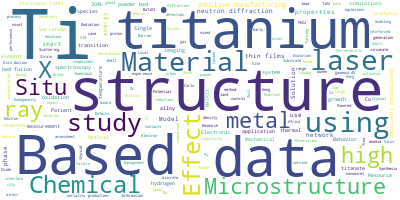

In [8]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(papers['TITULO'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [66]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'Security', 'TI', 'ti'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = papers.TITULO.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[0])

['systems', 'chemical', 'biology', 'study', 'malate', 'synthase', 'isocitrate', 'lyase', 'inhibition', 'mycobacterium', 'tuberculosis', 'active', 'nrp', 'growth']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [67]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1)]


In [68]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus[0]]


[(0,
  '0.016*"laser" + 0.011*"systems" + 0.011*"model" + 0.011*"system" + '
  '0.011*"labour" + 0.011*"using" + 0.011*"high" + 0.011*"two" + '
  '0.011*"market" + 0.008*"impact"'),
 (1,
  '0.021*"laser" + 0.015*"additive" + 0.009*"manufacturing" + '
  '0.007*"molecular" + 0.007*"structure" + 0.007*"monte" + 0.007*"tio" + '
  '0.007*"sr" + 0.007*"modeling" + 0.007*"mechanical"'),
 (2,
  '0.013*"wo" + 0.013*"membrane" + 0.010*"high" + 0.009*"like" + '
  '0.007*"marinduque" + 0.007*"calancan" + 0.007*"performance" + '
  '0.007*"improvement" + 0.007*"cruz" + 0.007*"chip"'),
 (3,
  '0.017*"temperature" + 0.013*"chemical" + 0.012*"high" + 0.012*"induced" + '
  '0.012*"defect" + 0.006*"using" + 0.006*"dependent" + 0.006*"athena" + '
  '0.006*"structures" + 0.006*"evolution"'),
 (4,
  '0.020*"study" + 0.010*"ni" + 0.010*"based" + 0.010*"na" + 0.010*"reaction" '
  '+ 0.010*"foils" + 0.007*"land" + 0.005*"computational" + 0.005*"properties" '
  '+ 0.005*"temperature"'),
 (5,
  '0.020*"data" + 0

In [69]:
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./USS-DMDB-Taller2'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './USS-DMDB-Taller2'+ str(num_topics) +'.html')

LDAvis_prepared

c:\Users\Admn\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.024928  0.099147       1        1  12.910345
6      0.124534 -0.072396       2        1  12.864286
4     -0.107955 -0.082905       3        1  12.617326
0     -0.031382  0.124128       4        1  11.224539
8     -0.104543 -0.014299       5        1   9.976862
3      0.058561  0.021776       6        1   9.575276
9     -0.010205 -0.043523       7        1   8.295568
5      0.028534 -0.036070       8        1   7.993252
2      0.023086 -0.023479       9        1   7.799016
1     -0.005557  0.027621      10        1   6.743532, topic_info=          Term      Freq     Total Category  logprob  loglift
82       laser  6.000000  6.000000  Default  30.0000  30.0000
81        high  8.000000  8.000000  Default  29.0000  29.0000
385       data  2.000000  2.000000  Default  28.0000  28.0000
10       study  4.000000  4.000000  Default  27.0000  27.0000
107      based  5.000000  5.000000  Default  26.0000  26.0000
..         ...       ...       ...      ...      ...      ...
119  diffusion  0.522839  2.217904  Topic10  -4.8931   1.2515
79          al  0.522838  2.347404  Topic10  -4.8931   1.1948
402    melting  0.522835  2.246985  Topic10  -4.8931   1.2385
656       thin  0.522835  1.694903  Topic10  -4.8931   1.5205
404  selective  0.522834  2.247013  Topic10  -4.8931   1.2385

[457 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
125       5  0.879228     across
171       7  0.611364   adaptive
171       8  0.611364   adaptive
161       1  0.307648   additive
161       4  0.307648   additive
...     ...       ...        ...
28        3  0.832851      women
198       3  0.832836      xtisn
342       5  0.878010  zirconium
185       8  0.914237       zone
343       5  0.879233       zrcl

[515 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 7, 5, 1, 9, 4, 10, 6, 3, 2])